In [1]:
%matplotlib inline

In [2]:
from IPython.display import HTML
style = "<style>svg{width:70% !important;height:70% !important;}.container{width:70% !important;}</style></style>"
HTML(style)

In [3]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [4]:
df = pd.read_csv('../../../resources/training_mush.csv')
df.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,2,0,3,1,5,1,0,0,9,1,...,3,7,0,2,1,4,3,5,0,0
1,2,0,4,0,5,1,0,1,10,0,...,7,4,0,2,1,0,7,4,0,1
2,2,0,3,0,2,1,0,0,7,0,...,0,4,0,2,1,2,1,5,1,1
3,0,0,3,0,5,1,1,0,2,0,...,7,7,0,2,2,4,7,3,1,0
4,2,3,3,1,5,1,0,0,10,1,...,3,6,0,2,1,4,2,5,0,0


In [5]:
y = df["class"]
y.head()

0    0
1    1
2    1
3    0
4    0
Name: class, dtype: int64

In [6]:
x = df.drop(["class"], axis=1)
x.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,2,0,3,1,5,1,0,0,9,1,...,2,3,7,0,2,1,4,3,5,0
1,2,0,4,0,5,1,0,1,10,0,...,3,7,4,0,2,1,0,7,4,0
2,2,0,3,0,2,1,0,0,7,0,...,1,0,4,0,2,1,2,1,5,1
3,0,0,3,0,5,1,1,0,2,0,...,2,7,7,0,2,2,4,7,3,1
4,2,3,3,1,5,1,0,0,10,1,...,2,3,6,0,2,1,4,2,5,0


In [7]:
clf = RandomForestClassifier(random_state=0)

In [8]:
parametrs = {"n_estimators": range(10, 50, 10), "max_depth": range(1, 12, 2), "min_samples_leaf": range(1, 7), 
             "min_samples_split": range(2, 9, 2)}

In [9]:
grid_search_cv_clf = GridSearchCV(clf, parametrs, cv=3, n_jobs=-1)

In [10]:
grid_search_cv_clf.fit(x, y)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=0,
                                   

In [11]:
grid_search_cv_clf.best_params_

{'max_depth': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10}

In [12]:
best_clf = grid_search_cv_clf.best_estimator_

In [13]:
best_clf.feature_importances_

array([0.00257742, 0.00312957, 0.02177298, 0.07010933, 0.18837641,
       0.        , 0.0808402 , 0.06846076, 0.10386114, 0.00756262,
       0.10379322, 0.03180155, 0.04829594, 0.01768932, 0.00625335,
       0.        , 0.0108812 , 0.0139101 , 0.07072612, 0.08356419,
       0.04378343, 0.02261118])

In [14]:
feature_importances_df = pd.DataFrame({"features": x.columns, "feature_importances": best_clf.feature_importances_})
feature_importances_df.sort_values("feature_importances", ascending=False)

,features,feature_importances
4,odor,0.188376
8,gill-color,0.103861
10,stalk-root,0.103793
19,spore-print-color,0.083564
6,gill-spacing,0.080840
18,ring-type,0.070726
3,bruises,0.070109
7,gill-size,0.068461
12,stalk-surface-below-ring,0.048296
20,population,0.043783


In [15]:
x_testing = pd.read_csv('../../../resources/testing_mush.csv')

In [16]:
x_testing.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,3,8,1,3,1,0,0,4,0,...,2,7,7,0,2,1,4,2,3,3
1,5,3,4,1,5,1,0,0,10,1,...,2,6,6,0,2,1,4,3,5,0
2,3,3,4,0,8,1,0,1,0,1,...,2,7,6,0,2,1,0,7,4,4
3,3,2,2,0,7,1,0,1,0,1,...,1,6,7,0,2,1,0,7,4,0
4,3,2,2,0,8,1,0,1,0,1,...,1,6,6,0,2,1,0,7,4,4


In [17]:
pred = best_clf.predict(x_testing)

In [18]:
pred

array([0, 0, 1, ..., 1, 0, 1])

In [19]:
np.count_nonzero(pred == 1)

976

In [20]:
pd.Series(pred).value_counts()

0    1055
1     976
dtype: int64

In [21]:
pred.sum()

976

In [22]:
predicted = pd.DataFrame(pred, columns=['predicted_class'])
predicted.groupby('predicted_class').agg({'predicted_class':'count'})

,predicted_class
predicted_class,
0,1055
1,976


In [23]:
np.unique(pred, return_counts=True)

(array([0, 1]), array([1055,  976]))

In [24]:
y_true = pd.read_csv('../../../resources/testing_y_mush.csv')

In [25]:
y_true.head()

,class
0,0
1,0
2,1
3,1
4,1


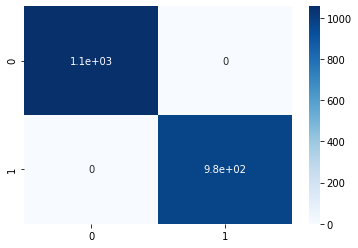

In [26]:
sns.heatmap(confusion_matrix(y_true, pred), annot=True, cmap="Blues")